In [2]:
import pandas as pd
import dalecLoad
import numpy as np
import statistics
import matplotlib.pyplot as plt
import spectralConv

In [3]:
def SD_Rrs(RSR_doves, DALEC_sample, spect_wavelengths, x=None, RHO=0.028, nsteps=601):
    '''
    does SD band calc for Lu, Lsky and Ed for a given DALEC sample, then converts this to Rrs using RHO
    returns a df with Lu, Lsky, Ed and Rrs
    '''
    Lu = dalecLoad.uniform_grid_spectra(DALEC_sample, spect_wavelengths, param='Lu', nsteps=nsteps)[:, 1]
    Lsky = dalecLoad.uniform_grid_spectra(DALEC_sample, spect_wavelengths, param='Lsky', nsteps=nsteps)[:, 1]
    Ed = dalecLoad.uniform_grid_spectra(DALEC_sample, spect_wavelengths, param='Ed', nsteps=nsteps)[:, 1]
    
    if x is None:
        x = RSR_doves['Wavelength (nm)'].values
    
    Lw = Lu - (RHO * Lsky)
    
    Lw_SD = spectralConv.SD_band_calc(RSR_doves, Lw, x)
    print(len(Lw_SD))
    Lu_SD = spectralConv.SD_band_calc(RSR_doves, Lu, x)
    print(len(Lu_SD))
    Lsky_SD = spectralConv.SD_band_calc(RSR_doves, Lsky, x)
    print(len(Lsky_SD))
    Ed_SD = spectralConv.SD_band_calc(RSR_doves, Ed, x)
    print(len(Ed_SD))
    Rrs_SD = Lw_SD / Ed_SD
    print(len(Rrs_SD))
    print(len(x))
    
    df_out = pd.DataFrame(data={'Wavelength': x,
                           'Lu': Lu_SD, 
                           'Lw': Lw_SD,
                           'Lsky': Lsky_SD,
                           'Ed': Ed_SD,
                           'Rrs': Rrs_SD})
    
    return df_out

In [4]:
tables = dalecLoad.multiLogLoad('data/20-jun-22/Logs_20-Jun-22_20220623.dtf', dropNA=False)
spect_wavelengths = dalecLoad.load_DALEC_spect_wavelengths('data/20-jun-22/Logs_20-Jun-22_20220623.dtf')

In [5]:
SD_airthrey = pd.read_csv('non-DALEC-data/superDoveAirthrey-20-Jun-acolite.csv', sep='\t')
RSR_doves = pd.read_csv('non-DALEC-data/RSR-Superdove.csv')
RSR_doves


,Wavelength (nm),Coastal-Blue response,Blue response,Green_i response,Green_ii response,Yellow response,Red response,Red-edge response,NIR response
0,400,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,401,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,402,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,403,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,404,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
596,996,0.0,0.000228,0.0,0.0,0.0,0.0,0.0,0.0
597,997,0.0,0.000228,0.0,0.0,0.0,0.0,0.0,0.0
598,998,0.0,0.000228,0.0,0.0,0.0,0.0,0.0,0.0
599,999,0.0,0.000228,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
dalec_SD = spectralConv.SD_Rrs(RSR_doves, tables['Log 1'].loc[4], spect_wavelengths, x=None, RHO=0.028, nsteps=601)

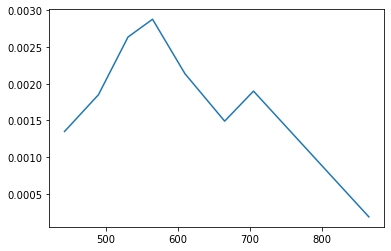

In [7]:
plt.plot(dalec_SD['Wavelength'], dalec_SD['Rrs'])

,Wavelength,Pin 1,Pin 1.1,Pin 2,Pin 2.1,Pin 3,Pin 3.1,Pin 4,Pin 4.1,Pin 5,Pin 5.1,Pin 6,Pin 6.1,Pin 7,Pin 7.1,Pin 8,Pin 8.1,Pin 9,Pin 9.1
0,443.661072,0.102367,-0.001079,0.105598,0.003331,0.109069,0.008060,0.104856,0.002318,0.103131,-0.000036,0.104856,0.002318,0.107039,0.005295,0.103633,0.000650,0.106995,0.005236
1,492.301270,0.076914,0.006625,0.076808,0.006491,0.077357,0.007188,0.077019,0.006760,0.077251,0.007054,0.077694,0.007617,0.077589,0.007483,0.077083,0.006840,0.077167,0.006947
2,532.734314,0.061112,0.010797,0.061247,0.010965,0.059129,0.008327,0.060390,0.009899,0.062081,0.012003,0.062441,0.012452,0.062599,0.012648,0.061990,0.011891,0.061720,0.011554
3,565.765198,0.052823,0.013879,0.052023,0.012879,0.052068,0.012936,0.053555,0.014794,0.054081,0.015451,0.052754,0.013793,0.051977,0.012822,0.052091,0.012965,0.051954,0.012793
4,611.647156,0.038389,0.007023,0.038856,0.007596,0.039200,0.008017,0.038954,0.007716,0.039175,0.007987,0.038168,0.006752,0.037873,0.006391,0.037971,0.006511,0.038020,0.006571
5,666.443787,0.032313,0.006334,0.030111,0.003805,0.032010,0.005986,0.033496,0.007693,0.034405,0.008735,0.033111,0.007250,0.031872,0.005828,0.031625,0.005544,0.030276,0.003995
6,706.962524,0.034662,0.013566,0.038340,0.017769,0.038370,0.017803,0.037722,0.017063,0.038399,0.017837,0.035721,0.014777,0.037752,0.017097,0.035633,0.014676,0.037310,0.016593
7,865.511475,0.060030,0.047455,0.054672,0.041765,0.063123,0.050738,0.063820,0.051478,0.065083,0.052818,0.061511,0.049027,0.059202,0.046576,0.059681,0.047085,0.056066,0.043246


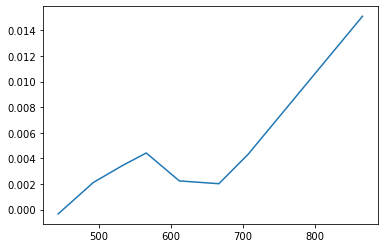

In [15]:
SD_airthrey = pd.read_csv('non-DALEC-data/superDoveAirthrey-20-Jun-acolite.csv', sep='\t')
plt.plot(SD_airthrey['Wavelength'].values, SD_airthrey['Pin 1.1'].values/np.pi)

SD_airthrey

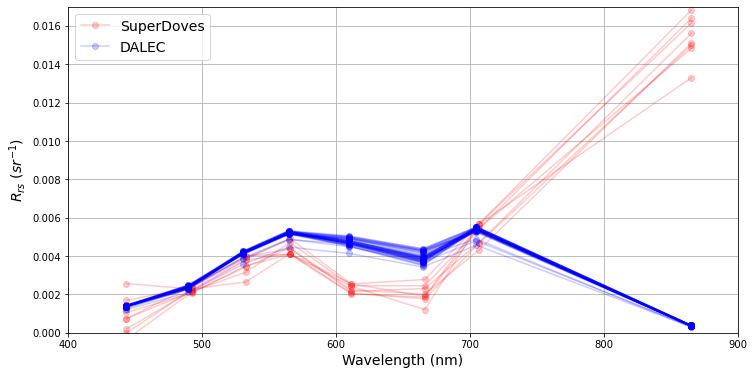

In [24]:
# superdoves wavelengths
SD_x = [443, 490, 531, 565, 610, 665, 705, 865]

# we need to divide the acolite data by pi (3.14) to get it to the same units as Rrs data from DALEC

fig, ax = plt.subplots(figsize=(12, 6))

for col in SD_airthrey.columns[1:-1]:
    if '.' in col:
        ax.plot(SD_airthrey['Wavelength'].values,
                SD_airthrey[col].values/np.pi,
                color='red',
                marker='o',
                alpha=0.2, 
                label='SuperDoves')

#ax.plot(RSR_doves['Wavelength (nm)'].values, Rrs, 'k--', label='DALEC, 20-Jun')


#ax.plot(SD_x, Rrs_SD, marker='o', label='DALEC sampled to S.D. bands, 20-Jun')
#ax.plot(SD_x, Rrs_SD_avg, marker='o', label='$R_{rs}$, SD bands (DALEC AVG 19-May)')

for sample in tables['Log 2'].index.get_level_values('Sample #').unique():
    dalec_SD = spectralConv.SD_Rrs(RSR_doves,
                                   tables['Log 2'].loc[sample],
                                   spect_wavelengths)
    ax.plot(dalec_SD['Wavelength'],
            dalec_SD['Rrs'],
            marker='o',
            alpha=0.2,
            color='blue',
            label='DALEC')
    
plt.rc('axes', labelsize=14) #fontsize of the x and y labels
plt.rc('legend', fontsize=14) #fontsize of the legend

# this code removes duplicate labels in the legend. thanks stackoverflow!
handles, labels = ax.get_legend_handles_labels()
newLabels, newHandles = [], []
for handle, label in zip(handles, labels):
    if label not in newLabels:
        newLabels.append(label)
        newHandles.append(handle)
ax.legend(newHandles, newLabels)


ax.set_xlim(400, 900)
ax.set_ylim(0, 0.017)

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('$R_{rs}$ $(sr^{-1}$)')
ax.grid()
plt.show()